In [16]:
!pip3 install tensorflow_datasets

In [17]:


import tensorflow as tf
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten,GlobalAveragePooling2D


## CIFAR-10 Dataset
CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

https://www.cs.toronto.edu/~kriz/cifar.html

labels = [‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’]

## Read the data, Split to train test

In [18]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.cifar10.load_data()

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

[2]


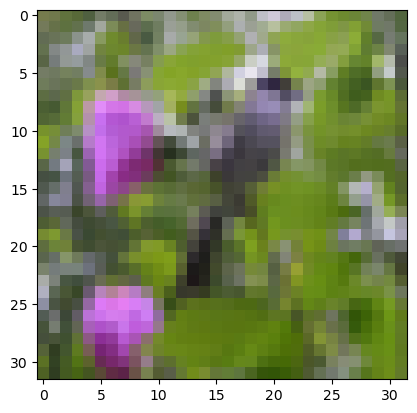

In [22]:
plt.imshow(X_train[300,:,:,:])
print(y_train[300])

## convert RGB to grayscale

In [23]:
#X_train=tf.image.rgb_to_grayscale(X_train).numpy()
#X_test=tf.image.rgb_to_grayscale(X_test).numpy()

[2]


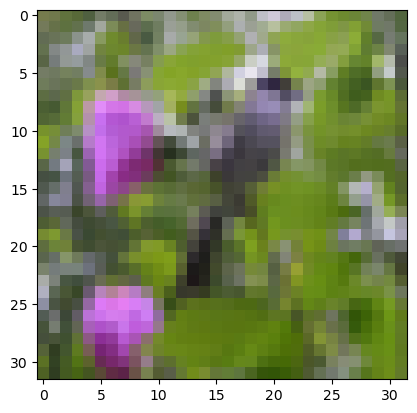

In [24]:
plt.imshow(X_train[300,:])
print(y_train[300])

In [25]:
X_train.shape

(50000, 32, 32, 3)

## Pre-process (normalize or scale images, reshape, one hot encoding of y) (for ANN)

In [26]:
# Normalize
X_train=X_train/255.
X_test=X_test/255.


In [27]:
#Reshape
X_train1=X_train.reshape(50000,32*32*3)
X_test1=X_test.reshape(10000,32*32*3)

In [28]:
print(X_train1.shape)
print(X_train.shape)

(50000, 3072)
(50000, 32, 32, 3)


In [29]:
#One_hot_encoding
y_train1=to_categorical(y_train, num_classes=10)
y_test1=to_categorical(y_test, num_classes=10)


# Model building - ANN

In [30]:
tf.keras.backend.clear_session()

In [49]:
model=Sequential()
#model.add(Flatten(32,32,3))

#hidden layer
model.add(Dense(units=64,activation='relu',input_dim=3072))
model.add(tf.keras.layers.Dropout(rate=.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units=16,activation='relu'))

# out put layer
model.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,834 (780.60 KB)

 Trainable params: 199,642 (779.85 KB)

 Non-trainable params: 192 (768.00 B)

## compile and fit

In [46]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train1,
          y=y_train1,
          batch_size=32,
          epochs=20,
          verbose='auto',
          validation_data=[X_test1, y_test1])
    
model.summary()

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1615 - loss: 2.2720 - val_accuracy: 0.1852 - val_loss: 2.1109
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2033 - loss: 2.1055 - val_accuracy: 0.2791 - val_loss: 1.9828
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2370 - loss: 2.0276 - val_accuracy: 0.2604 - val_loss: 2.0148
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2398 - loss: 2.0171 - val_accuracy: 0.2630 - val_loss: 1.9606
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2532 - loss: 1.9926 - val_accuracy: 0.2870 - val_loss: 1.9506
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2577 - loss: 1.9835 - val_accuracy: 0.3098 - val_loss: 1.8890
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2664 - loss: 1.9700 - val_accuracy: 0.2975 - val_loss: 1.8790
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2649 - loss: 1.9615 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,836 (780.61 KB)

 Trainable params: 199,642 (779.85 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [43]:
history=model.fit(x=X_train1,
          y=y_train1,
          batch_size=32,
          epochs=20,
          initial_epoch=11,
          verbose='auto',
          validation_data=[X_test1, y_test1])

Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5176 - loss: 1.3556 - val_accuracy: 0.4620 - val_loss: 1.5254
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5267 - loss: 1.3397 - val_accuracy: 0.4637 - val_loss: 1.5252
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5237 - loss: 1.3437 - val_accuracy: 0.4697 - val_loss: 1.5032
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5165 - loss: 1.3538 - val_accuracy: 0.4767 - val_loss: 1.4925
Epoch 16/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5249 - loss: 1.3396 - val_accuracy: 0.4555 - val_loss: 1.5469
Epoch 17/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5251 - loss: 1.3372 - val_accuracy: 0.4469 - val_loss: 1.6027
Epoch 18/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5225 - loss: 1.3330 - val_accuracy: 0.4492 - val_loss: 1.5737
Epoch 19/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5264 - loss: 1

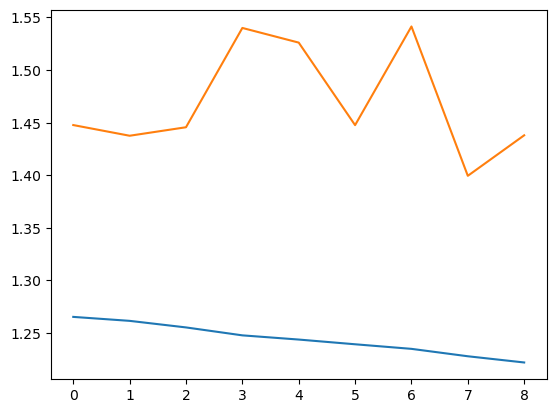

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

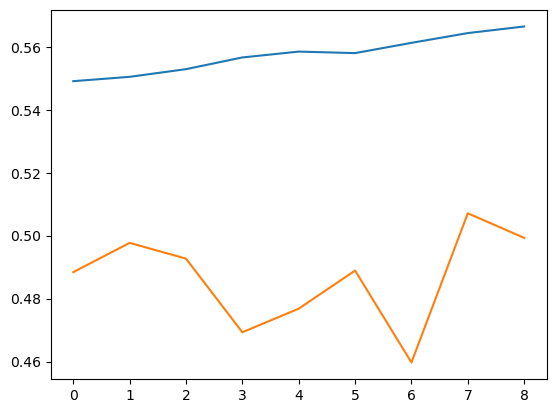

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Evaluate the model

In [37]:
model.evaluate(X_test1, y_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.5025 - loss: 1.4363


[1.4380019903182983, 0.4993000030517578]

##Load model and predict

In [39]:
#Load model from disk
model = tf.keras.models.load_model('cifar10_best_model.h5')
model.summary()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'cifar10_best_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
#Predict on first test example
model.predict(X_test1[0])

In [ ]:
model.input

In [ ]:
X_test1[0].shape

In [ ]:
np.expand_dims(X_test1[0], axis=0).shape

In [ ]:
pred = model.predict(np.expand_dims(X_test1[0], axis=0))
pred

In [ ]:
y_pred=np.argmax(pred, axis=1)
y_pred

In [ ]:
y_test[0]